In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
random_seed = 5

L = 
[[1 0 0]
 [1 1 0]
 [1 1 1]]
M = 
[[1 0 0]
 [2 1 0]
 [2 1 2]]
Theoretical AW_2^2:  3.0


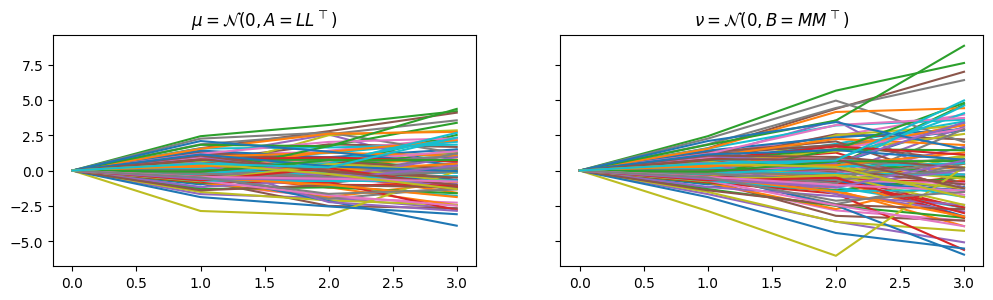

In [2]:
from pnot.utils import adapted_wasserstein_squared, matrixL2paths

n_sample = 20000
T = 3

L = np.array([[1, 0, 0], [1, 1, 0], [1, 1, 1]])
X ,A = matrixL2paths(L, n_sample, seed = random_seed)
print('L = ')
print(L)

M = np.array([[1, 0, 0], [2, 1, 0], [2, 1, 2]])
Y,B = matrixL2paths(M, n_sample, seed = random_seed)
print('M = ')
print(M)

awd2square = adapted_wasserstein_squared(A, B)
print("Theoretical AW_2^2: ", awd2square)

fig, ax = plt.subplots(1,2, figsize = [12,3], sharey=True)
ax[0].plot(X[:,:100])
ax[1].plot(Y[:,:100])
ax[0].set_title(r'$\mu = \mathcal{N}(0,A = LL^\top)$')
ax[1].set_title(r'$\nu = \mathcal{N}(0,B = MM^\top)$')
plt.show()

In [3]:
from pnot import nested_ot

n_sample = 20000
X,A = matrixL2paths(L, n_sample, seed = random_seed)
Y,B = matrixL2paths(M, n_sample, seed = random_seed)

grid_size = 0.1

print('Markovian')
print("="*200)
ot_value_markovian = nested_ot(X, Y, grid_size, markovian = True, num_threads=16, verbose = True)
print(" "*200)

print('Non-Markovian')
print("="*200)
ot_value = nested_ot(X, Y, grid_size, markovian = False, num_threads=16, verbose = True)

Markovian
Start computing with 16 threads
Timestep 2
Computing 17985 OTs .......
Timestep 1
Computing 5476 OTs .......
Timestep 0
Computing 1 OTs .......
1.78188 seconds
Nested OT value: 3.08972
Finish
                                                                                                                                                                                                        
Non-Markovian
Start computing with 16 threads
Timestep 2
Computing 6398364 OTs .......
Timestep 1
Computing 5476 OTs .......
Timestep 0
Computing 1 OTs .......
9.93493 seconds
Nested OT value: 3.2714
Finish
